<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/solutions/PSO_cv03_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Lab - Color Spaces

In this lab we will work with different colorspaces.

We will be using some GUI elements again so we have to install ipympl.

--2023-10-01 13:22:22--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/plant.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104311 (102K) [image/jpeg]
Saving to: ‘plant.jpg.1’

plant.jpg.1         100%[===================>] 101.87K  --.-KB/s    in 0.02s   

2023-10-01 13:22:22 (4.78 MB/s) - ‘plant.jpg.1’ saved [104311/104311]



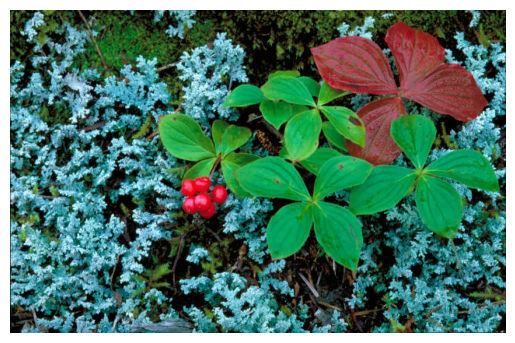

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/plant.jpg
import cv2
import matplotlib.pyplot as plt
img_b = cv2.imread('plant.jpg')
plt.imshow(img_b[:,:,::-1])
plt.axis('off')
plt.show()

In [ ]:
!pip install ipympl
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00


## Exercise 1 - Sliders - HSV, CIE Lab

HSV is a color model aimed at intuitive use (user-friendly model). Hue determines the position on a color ring, S stands for saturation and V for value, which determines the intensity.

CIE Lab is a three element model. L stands for luminance, a is position on the green-red axis and b is position on the blue-yellow axis.

Check out the opencv documentation on [color space conversions](https://docs.opencv.org/4.8.0/d8/d01/group__imgproc__color__conversions.html) to see how to change an image to this colorspace.

Implement the GUI with three slides from last week, but use HSV or Lab sliders instead of RGB ones.

*Note:* You have to convert the image back to BGR or RGB to display it correctly.



AppLayout(children=(GridspecLayout(children=(FloatSlider(value=1.0, description='H:', layout=Layout(grid_area=…

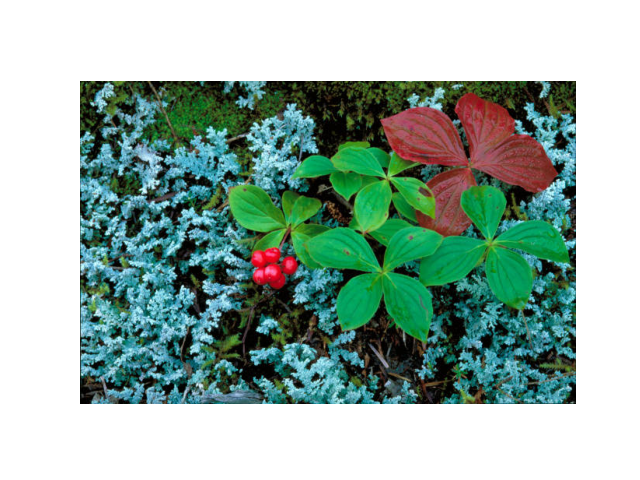

In [ ]:
from ipywidgets import AppLayout, FloatSlider, GridspecLayout, Button
import numpy as np

plt.close('all')

slider_h = FloatSlider(
    orientation='horizontal',
    description='H:',
    value=1.0,
    min=0.0,
    max=2.0
)

slider_s = FloatSlider(
    orientation='horizontal',
    description='S:',
    value=1.0,
    min=0.0,
    max=2.0
)

slider_v = FloatSlider(
    orientation='horizontal',
    description='V:',
    value=1.0,
    min=0.0,
    max=2.0
)


fig, axes = plt.subplots()
plt.axis('off')
img_axes = plt.imshow(img_b[:, :, ::-1])

def update(_):
    img_new = cv2.cvtColor(img_b, cv2.COLOR_BGR2HSV_FULL).astype(float)
    img_new[:, :, 0] *= slider_h.value
    img_new[:, :, 1] *= slider_s.value
    img_new[:, :, 2] *= slider_v.value
    img_new = cv2.cvtColor(np.clip(img_new.astype(np.uint8), 0, 255), cv2.COLOR_HSV2BGR_FULL)
    img_axes.set_data(img_new[:, :, ::-1])
    fig.canvas.draw()
    fig.canvas.flush_events()

slider_h.observe(update, names='value')
slider_s.observe(update, names='value')
slider_v.observe(update, names='value')

button = Button(
    description='Reset',
    disabled=False,
    tooltip='Click me',
)

def on_button_clicked(b):
    print("Sliders reset!")
    slider_h.value = 1.0
    slider_s.value = 1.0
    slider_v.value = 1.0


button.on_click(on_button_clicked)

grid = GridspecLayout(4, 1)

grid[0, 0] = slider_h
grid[1, 0] = slider_s
grid[2, 0] = slider_v
grid[3, 0] = button

AppLayout(center=fig.canvas, footer=grid, pane_heights=[0, 3, 1])

## Exercise 2 - Color Distances

In the second exercise you should implement a system in which a user clicks on three points in an image and the program returns the ratios of distances between the first and second point and the first and third points for RGB, HSV, and Lab.

You can try it using the image downloaded in the following script.

--2023-10-01 13:22:46--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/color_palette.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15730 (15K) [image/png]
Saving to: ‘color_palette.png’

color_palette.png   100%[===================>]  15.36K  --.-KB/s    in 0.001s  

2023-10-01 13:22:46 (26.6 MB/s) - ‘color_palette.png’ saved [15730/15730]



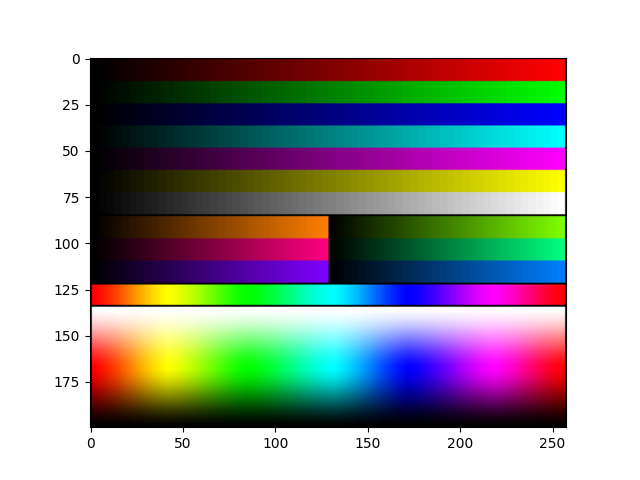

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/color_palette.png
color_img = cv2.imread('color_palette.png')
plt.figure()
plt.imshow(color_img[:, :, ::-1])
plt.show()

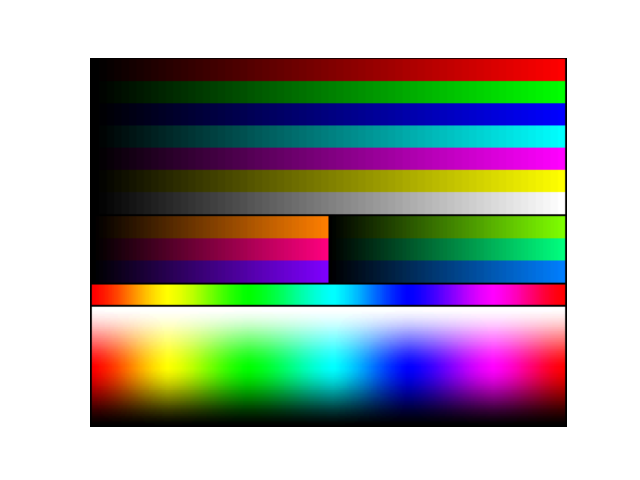

Point 1 selected! -  [  4 255   4]
Point 2 selected! -  [  8  40 255]
Point 3 selected! -  [ 16 246   0]
RGB ratio:  21.290521530811358 	 Dist 1-2:  330.5177756188009 	 Dist 1-3:  15.524174696260024
HSV ratio:  5.586404997140756 	 Dist 1-2:  56.142675390472796 	 Dist 1-3:  10.04987562112089
Lab ratio:  23.16351413531147  	 Dist 1-2:  182.3896926912264 	 Dist 1-3:  7.874007874011811
Already selected all - starting from first point
Point 1 selected! -  [  0 234 117]
Point 2 selected! -  [117 234   0]
Point 3 selected! -  [234 117   0]
RGB ratio:  0.5773502691896258 	 Dist 1-2:  165.46298679765212 	 Dist 1-3:  286.5902999056318
HSV ratio:  0.5 	 Dist 1-2:  30.0 	 Dist 1-3:  60.0
Lab ratio:  0.19964883469593456  	 Dist 1-2:  37.22902093797257 	 Dist 1-3:  186.47251808242416


In [ ]:
fig = plt.figure()
plt.axis('off')
plt.imshow(color_img[:,:,::-1])
plt.show()

points = []

img_bgr = np.copy(color_img).astype(float)
img_hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV).astype(float)
img_lab = cv2.cvtColor(color_img, cv2.COLOR_BGR2Lab).astype(float)

def print_distance_ratios(points):
    points = np.array(points, dtype=int)

    dist_12 = np.linalg.norm(img_bgr[points[0, 1], points[0, 0], :] - img_bgr[points[1, 1], points[1, 0], :])
    dist_13 = np.linalg.norm(img_bgr[points[0, 1], points[0, 0], :] - img_bgr[points[2, 1], points[2, 0], :])
    dist_rgb = dist_12 / dist_13
    print("RGB ratio: ", dist_rgb, "\t Dist 1-2: ", dist_12, "\t Dist 1-3: ", dist_13)
    dist_12 = np.linalg.norm(img_hsv[points[0, 1], points[0, 0], :] - img_hsv[points[1, 1], points[1, 0], :])
    dist_13 = np.linalg.norm(img_hsv[points[0, 1], points[0, 0], :] - img_hsv[points[2, 1], points[2, 0], :])
    dist_hsv = dist_12 / dist_13
    print("HSV ratio: ", dist_hsv, "\t Dist 1-2: ", dist_12, "\t Dist 1-3: ", dist_13)
    dist_12 = np.linalg.norm(img_lab[points[0, 1], points[0, 0], :] - img_lab[points[1, 1], points[1, 0], :])
    dist_13 = np.linalg.norm(img_lab[points[0, 1], points[0, 0], :] - img_lab[points[2, 1], points[2, 0], :])
    dist_lab = dist_12 / dist_13
    print("Lab ratio: ", dist_lab, " \t Dist 1-2: ", dist_12, "\t Dist 1-3: ", dist_13)

def onclick(event):
    if len(points) >= 3:
        print("Already selected all - starting from first point")
        points.clear()
    ix, iy = event.xdata, event.ydata
    points.append((ix, iy))
    print(f"Point {len(points)} selected! - ", color_img[int(iy), int(ix)])
    if len(points) == 3:
        print_distance_ratios(points)

cid = fig.canvas.mpl_connect('button_press_event', onclick)